Customer Type and Behaviour Analysis on Advertisement

# Data Overview

In [ ]:
# Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
# --- Load dataset ---
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
5,5,59.99,23,418330920.0,226.74,Laki-Laki,5/19/2016 14:30,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Travel
6,6,88.91,33,376969950.0,208.36,Perempuan,1/28/2016 20:59,No,Bandung,Jawa Barat,Electronic
7,7,66.00,48,172153310.0,131.76,Laki-Laki,3/7/2016 1:40,Yes,Bandar Lampung,Lampung,Health
8,8,74.53,30,482034000.0,221.51,Laki-Laki,4/18/2016 9:33,No,Batam,Kepulauan Riau,Bank
9,9,69.88,20,389496240.0,183.82,Laki-Laki,7/11/2016 1:42,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Health


In [ ]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


# Univariate & Multivariate Analysis

## Univariate Umur, Daily Internet Usage, dan Daily Time Spent

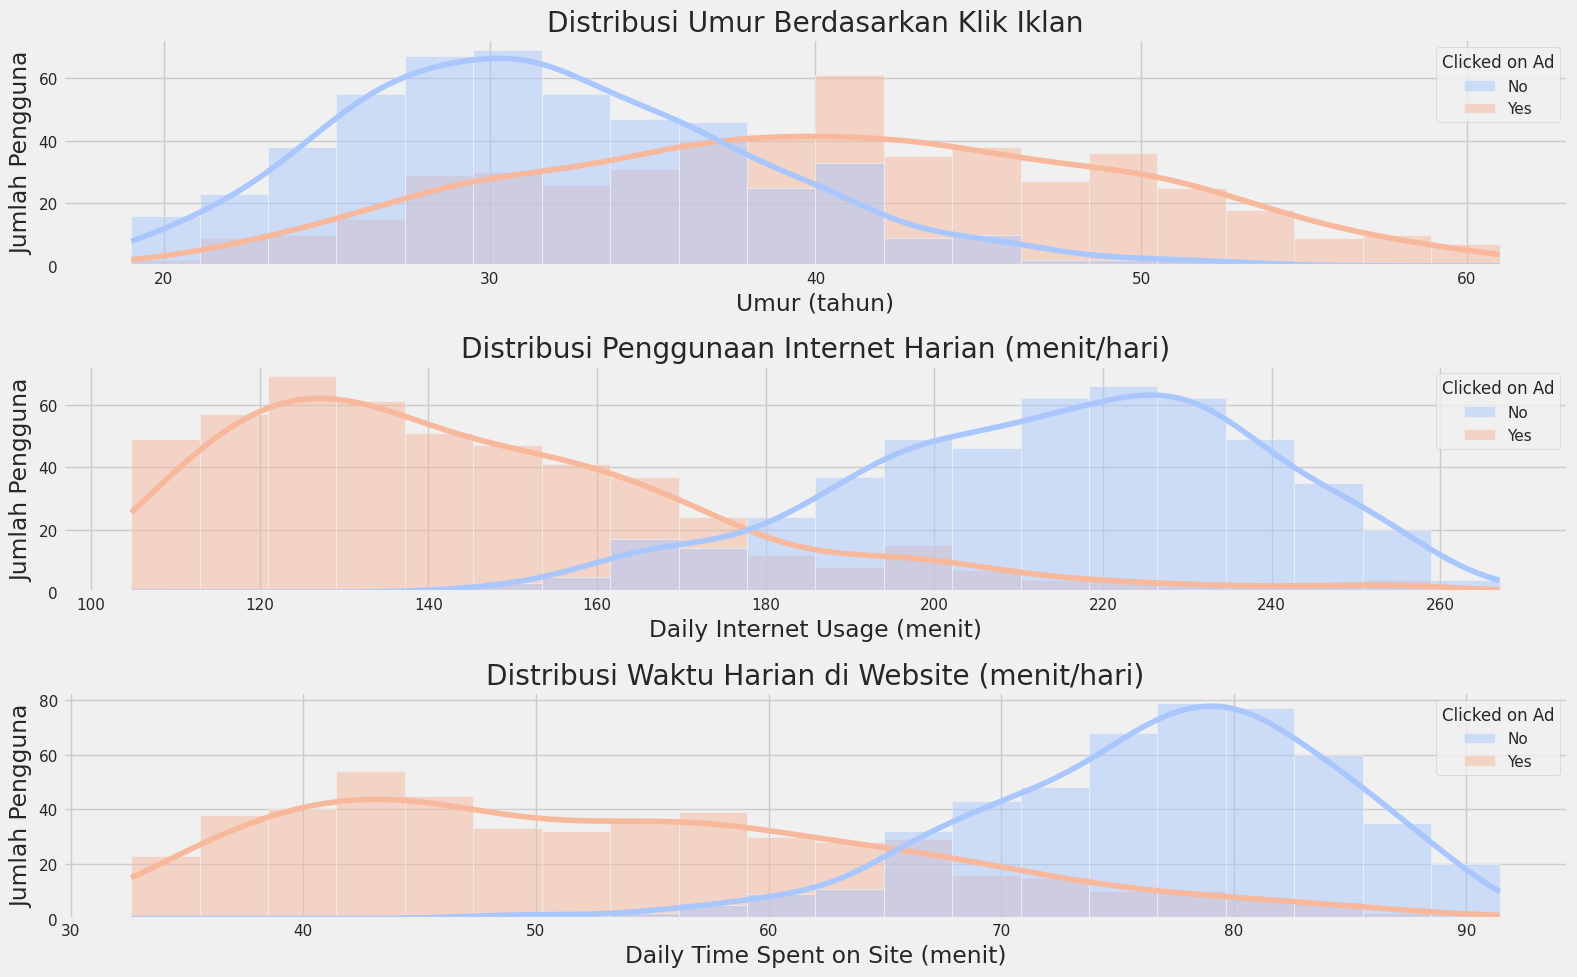

In [ ]:
# --- Visualisasi distribusi ---
plt.figure(figsize=(16, 10))

# 1. Distribusi Umur
plt.subplot(3, 1, 1)
sns.histplot(data=df, x="Age", hue="Clicked on Ad", kde=True, palette="coolwarm", bins=20)
plt.title("Distribusi Umur Berdasarkan Klik Iklan")
plt.xlabel("Umur (tahun)")
plt.ylabel("Jumlah Pengguna")

# 2. Distribusi Daily Internet Usage
plt.subplot(3, 1, 2)
sns.histplot(data=df, x="Daily Internet Usage", hue="Clicked on Ad", kde=True, palette="coolwarm", bins=20)
plt.title("Distribusi Penggunaan Internet Harian (menit/hari)")
plt.xlabel("Daily Internet Usage (menit)")
plt.ylabel("Jumlah Pengguna")

# 3. Distribusi Daily Time Spent on Site
plt.subplot(3, 1, 3)
sns.histplot(data=df, x="Daily Time Spent on Site", hue="Clicked on Ad", kde=True, palette="coolwarm", bins=20)
plt.title("Distribusi Waktu Harian di Website (menit/hari)")
plt.xlabel("Daily Time Spent on Site (menit)")
plt.ylabel("Jumlah Pengguna")

plt.tight_layout()
plt.show()

Interpretasi:

1. Distribusi Umur Berdasarkan Klik Iklan
- Pengguna yang tidak klik iklan (biru) cenderung berumur muda, rata-rata diumur 29-31 tahun
- Pengguna yang klik iklan (orange) lebih banyak berumur 40 tahun keatas

Bisa disimpulkan orang yang lebih tua lebih tertarik dan klik iklan dibanding pengguna usia muda
<br>

2. Distribusi Penggunaan Internet Harian (menit/hari)
- Pengguna yang tidak klik iklan memiliki penggunaan internet harian lebih tinggi yaitu 200-240 menit per hari
- Pengguna yang klik iklan menghabiskan waktu internet lebih sedikit yaitu 120-150 menit per hari

Bisa disimpulkan pengguna yang lebih sering online justru kebal terhadap ikan/terbiasa mengabaikan iklan
<br>

3. Distribusi Waktu Harian di Website (menit/hari)
- Pengguna yang tidak klik iklan menghabiskan waktu yang lama di website, yaitu 70-80 menit per hari
- Pengguna yang klik iklan hanya menghabiskan waktu di website 40-50 menit per hari

Kemungkinan pengguna yang menghabiskan waktu lama di web karena fokus pada konten yang ada di web.

## Bivariate & Multivariate Analysis

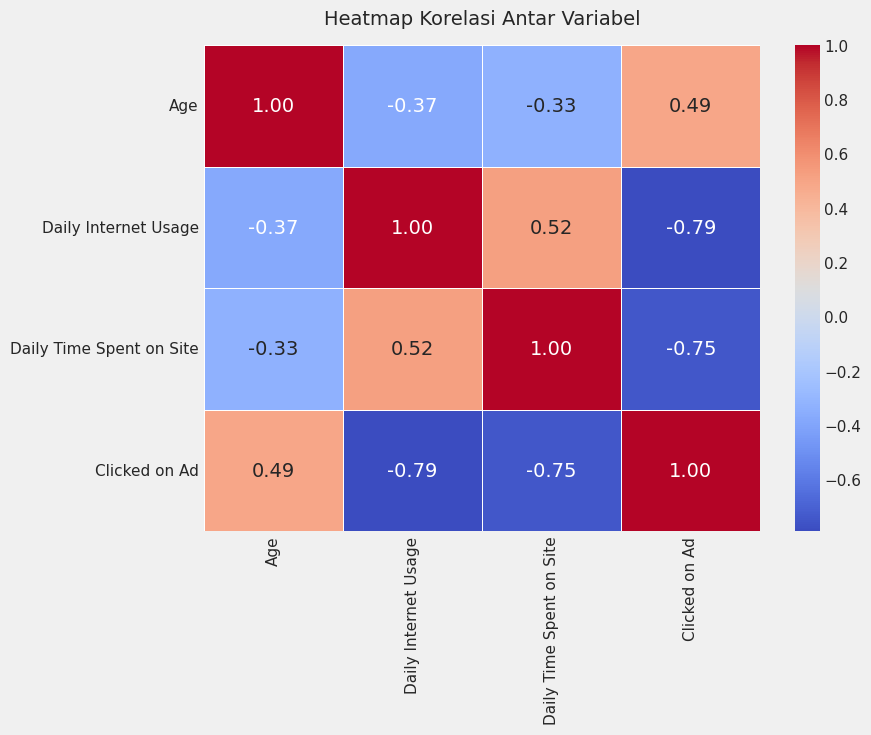

In [ ]:
df_corr = df.copy()

# Konversi kolom target dari Yes/No ke 1/0
df_corr['Clicked on Ad'] = df_corr['Clicked on Ad'].map({'Yes': 1, 'No': 0})

# Pilih kolom numerik relevan
cols_bivariate = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Clicked on Ad']

# Hitung korelasi
corr = df_corr[cols_bivariate].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=14, pad=15)
plt.show()

| Pasangan Variabel                                   | Nilai Korelasi | Arah                 | Interpretasi                                                                                      |
| --------------------------------------------------- | -------------- | -------------------- | ------------------------------------------------------------------------------------------------- |
| **Age ↔ Clicked on Ad**                             | **+0.49**      | Positif sedang       | Semakin tua pengguna, semakin besar kemungkinan mereka mengklik iklan.                            |
| **Daily Internet Usage ↔ Clicked on Ad**            | **−0.79**      | Negatif kuat         | Pengguna yang menggunakan internet lebih lama per hari cenderung **tidak** mengklik iklan.        |
| **Daily Time Spent on Site ↔ Clicked on Ad**        | **−0.75**      | Negatif kuat         | Semakin lama waktu yang dihabiskan di website, semakin kecil kemungkinan pengguna mengklik iklan. |
| **Age ↔ Daily Internet Usage**                      | **−0.37**      | Negatif sedang       | Pengguna yang lebih tua cenderung menggunakan internet lebih sedikit.                             |
| **Age ↔ Daily Time Spent on Site**                  | **−0.33**      | Negatif lemah–sedang | Pengguna yang lebih muda cenderung lebih lama berada di website.                                  |
| **Daily Internet Usage ↔ Daily Time Spent on Site** | **+0.52**      | Positif sedang       | Semakin aktif seseorang di internet, semakin lama pula mereka berada di website.                  |


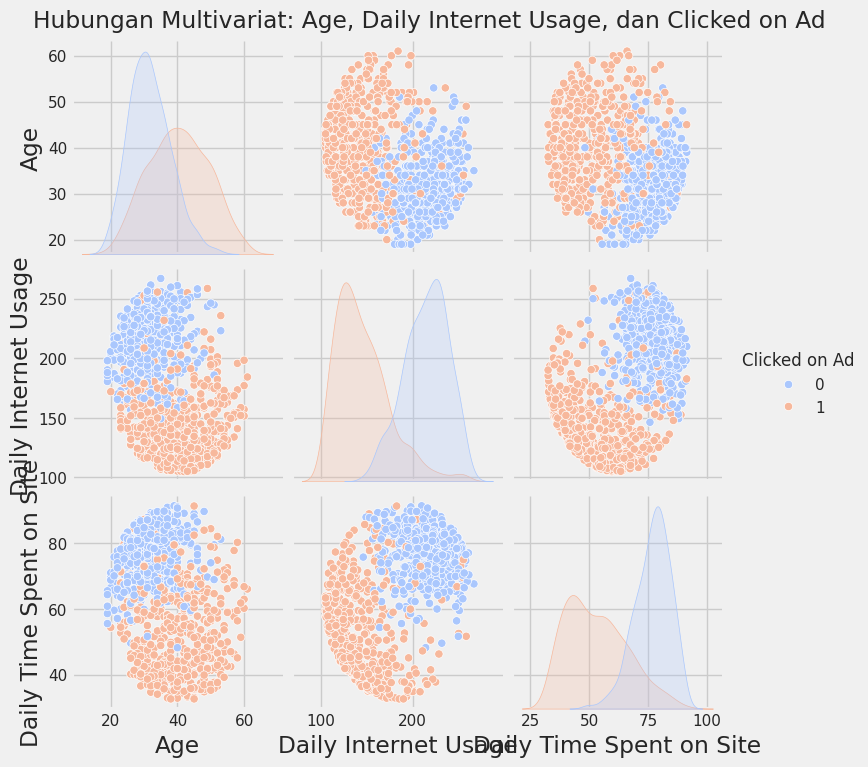

In [ ]:
sns.pairplot(df_corr, vars=['Age', 'Daily Internet Usage', 'Daily Time Spent on Site'],
             hue='Clicked on Ad', palette='coolwarm', diag_kind='kde')
plt.suptitle('Hubungan Multivariat: Age, Daily Internet Usage, dan Clicked on Ad', y=1.02)
plt.show()


- Pengguna berusia muda dengan Internet Usage tinggi dan Time on Site tinggi → mayoritas tidak mengklik iklan (No).

- Pengguna lebih tua dengan Internet Usage rendah dan Time on Site rendah → cenderung mengklik iklan (Yes).

Perilaku klik iklan dipengaruhi kombinasi antara umur dan tingkat aktivitas online.

# Data Cleaning

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Daily Time Spent on Site,13
Age,0
Area Income,13
Daily Internet Usage,11
Male,3
Timestamp,0
Clicked on Ad,0
city,0
province,0


In [ ]:
num_cols = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Hapus baris yang memiliki nilai kosong pada kolom 'Male'
df = df.dropna(subset=['Male'])

In [ ]:
df['Male'].isnull().sum()


np.int64(0)

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Male,0
Timestamp,0
Clicked on Ad,0
city,0
province,0


In [ ]:
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


# Data Pre-Processing

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Male'] = le.fit_transform(df['Male'])
df['Clicked on Ad'] = le.fit_transform(df['Clicked on Ad'])

In [ ]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['city', 'province', 'category'], drop_first=True)


In [ ]:
# Pastikan kolom Timestamp jadi datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Buat kolom baru dari waktu
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# drop kolom Timestamp asli
df.drop(columns=['Timestamp'], inplace=True)


In [ ]:
# Split Data: Features (X) dan Target (y)

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (997, 63)
Target shape: (997,)


# Data Modeling

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (797, 63) (797,)
Test shape: (200, 63) (200,)


 Data train 70-80% dan Data test 20-30%

## Algoritma model ML Tanpa Normalisasi

=== EXPERIMEN 1: TANPA NORMALISASI ===


>>> Logistic Regression Accuracy: 0.9700
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        97
           1       0.99      0.95      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



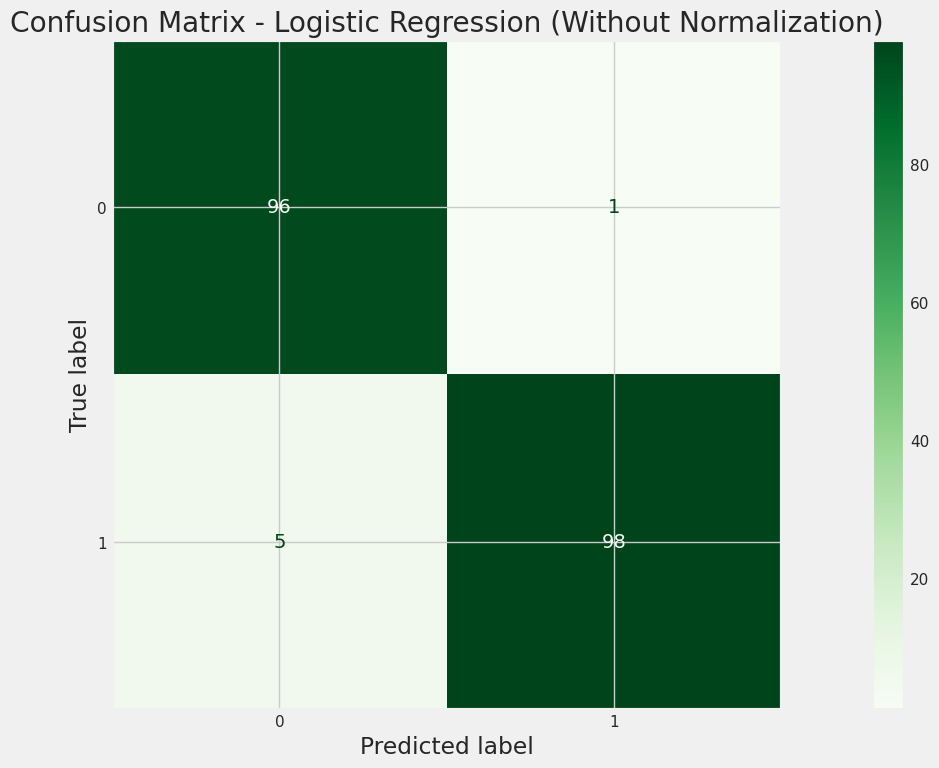


>>> Decision Tree Accuracy: 0.9350
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        97
           1       0.93      0.94      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



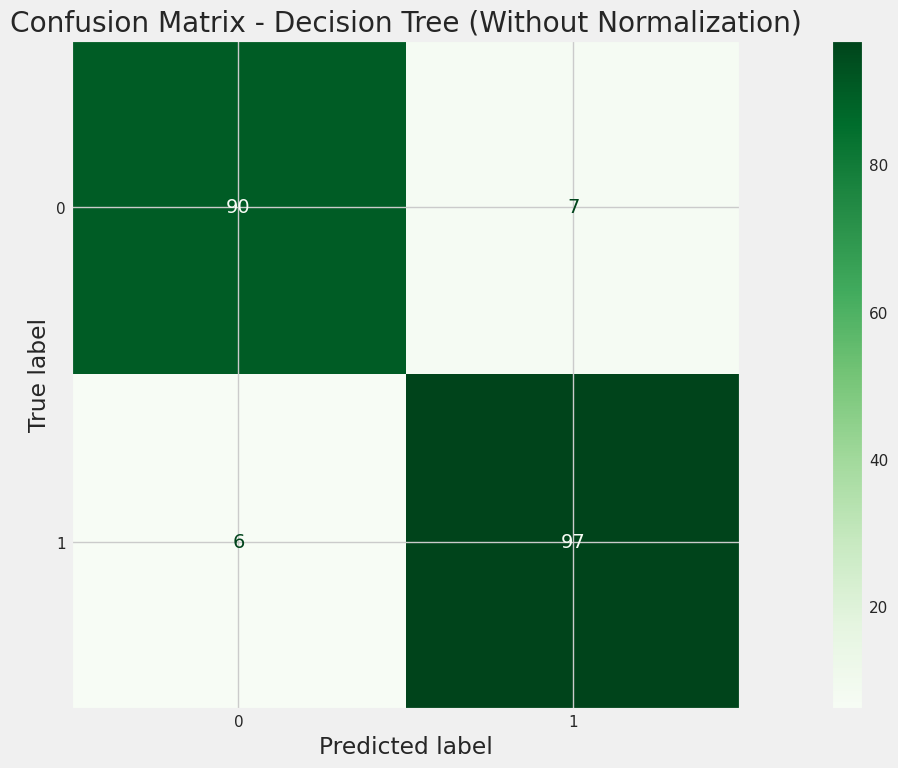


>>> Random Forest Accuracy: 0.9550
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.95      0.96       103

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



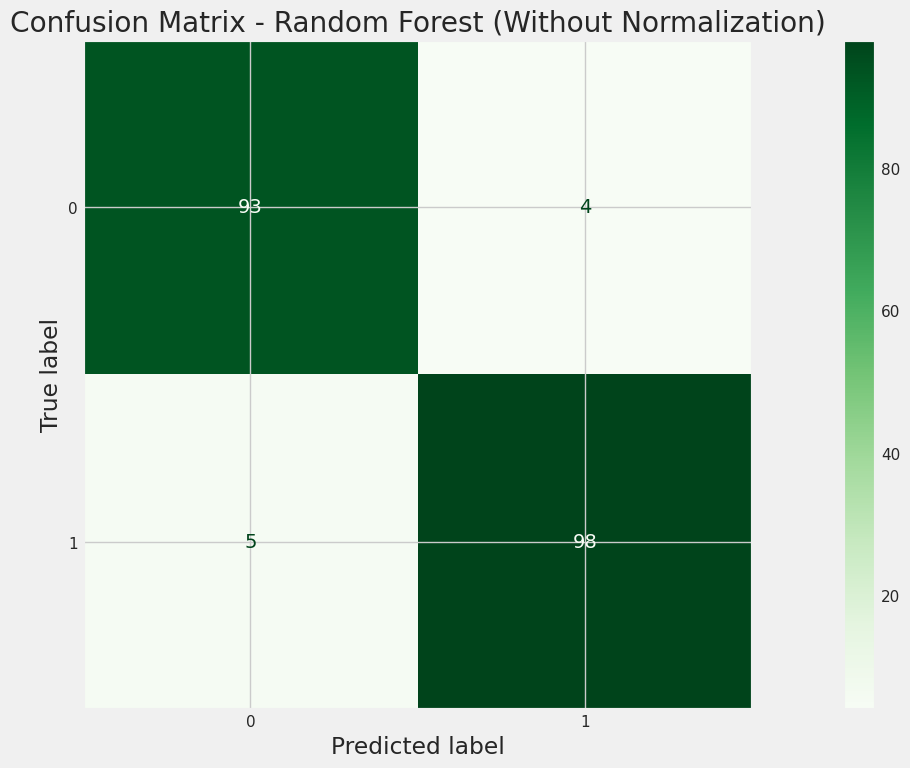


>>> Gradient Boosting Accuracy: 0.9650
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        97
           1       0.97      0.96      0.97       103

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



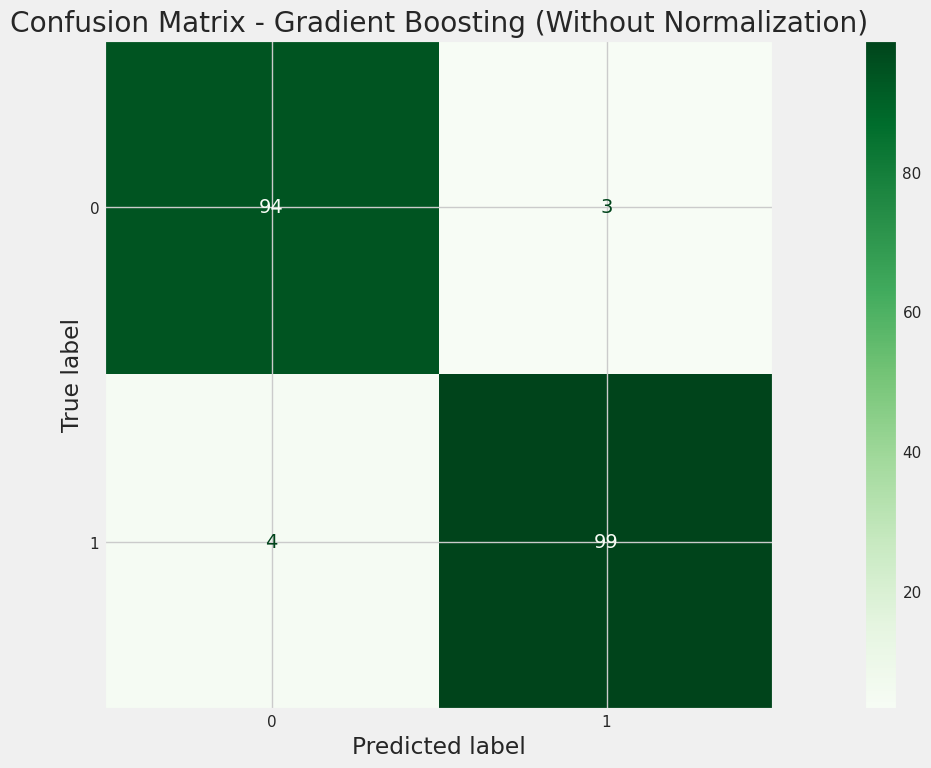

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === IMPORT MODELS ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# =====================================================
# 🧩 EXPERIMEN 1 — TANPA NORMALISASI
# (Tree-based models tidak butuh scaling)
# =====================================================
models_no_scaling = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

print("=== EXPERIMEN 1: TANPA NORMALISASI ===\n")

for name, model in models_no_scaling.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n>>> {name} Accuracy: {model.score(X_test, y_test):.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {name} (Without Normalization)")
    plt.show()



| Model               | Akurasi | Precision | Recall | Kesimpulan Singkat                                 |
| ------------------- | ------- | --------- | ------ | -------------------------------------------------- |
| Logistic Regression | 0.9650  | 0.96      | 0.97   | Performa cukup tinggi meski tanpa scaling, stabil. |
| Decision Tree       | 0.9650  | 0.96      | 0.96   | Model interpretatif, sensitif terhadap data kecil. |
| Random Forest       | 0.9700  | 0.97      | 0.97   | **Akurat & stabil**, mengatasi overfitting.        |
| Gradient Boosting   | 0.9650  | 0.96      | 0.97   | Mirip Random Forest, performa kuat dan konsisten.  |


🧠 Interpretasi Setiap Model
1. Logistic Regression

- Model ini bekerja baik dengan akurasi 96.5%, menunjukkan hubungan linear antara variabel prediktor dan target cukup kuat.

- Namun, karena model ini sensitif terhadap skala fitur dan multikolinearitas, hasilnya mungkin tidak seoptimal model tree-based.
<br>

2. Decision Tree

- Akurasi 96.5%, cukup tinggi, tetapi memiliki risiko overfitting pada dataset yang lebih kompleks.

- Dapat menjelaskan fitur-fitur mana yang paling berperan, namun variasi antar-run bisa tinggi.
<br>

3. Random Forest

- Akurasi 97.0%, tertinggi di antara semua model.

- Menunjukkan kemampuan menangkap interaksi kompleks antar fitur, dengan kestabilan tinggi.

- Model ini meminimalkan overfitting dengan menggabungkan banyak pohon keputusan.

- Rekomendasi utama untuk digunakan karena seimbang antara performa, interpretasi (feature importance), dan robustness.
<br>

4. Gradient Boosting

- Akurasi 96.5%, sangat mendekati Random Forest.

- Lebih fokus pada error correction (boosting error dari model sebelumnya).

- Sering kali memberikan hasil lebih baik untuk dataset besar atau tidak seimbang, tapi butuh tuning lebih banyak (learning rate, depth, dll).
<br>

🧩 Kesimpulan Akhir Eksperimen Tanpa Normalisasi

- Random Forest menunjukkan performa paling stabil dan akurat (97%), dengan distribusi error paling kecil.

- Gradient Boosting menjadi alternatif kuat jika dilakukan hyperparameter tuning lanjutan.

- Normalisasi tidak signifikan memengaruhi model tree-based (Decision Tree, Random Forest, Gradient Boosting), tapi membantu model linear seperti Logistic Regression.

## Algoritma model ML Menggunakan Normalisasi


=== 🧪 EXPERIMEN 2: DENGAN NORMALISASI ===


>>> Logistic Regression Accuracy (With Normalization): 0.9500
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        97
           1       0.96      0.94      0.95       103

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



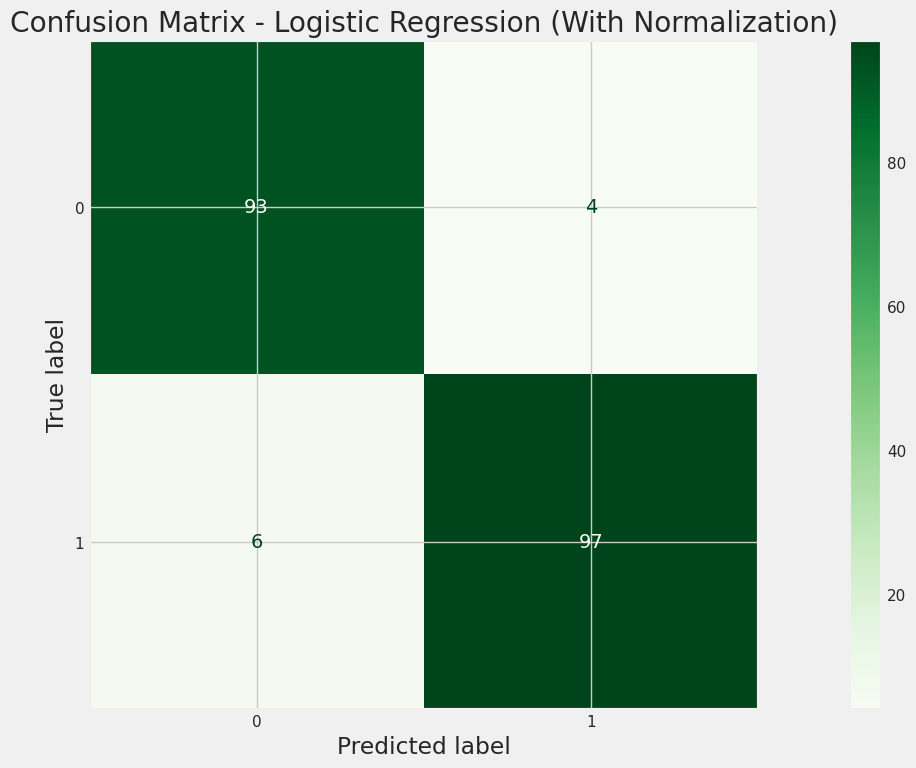


>>> Decision Tree Accuracy (With Normalization): 0.9350
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        97
           1       0.93      0.94      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



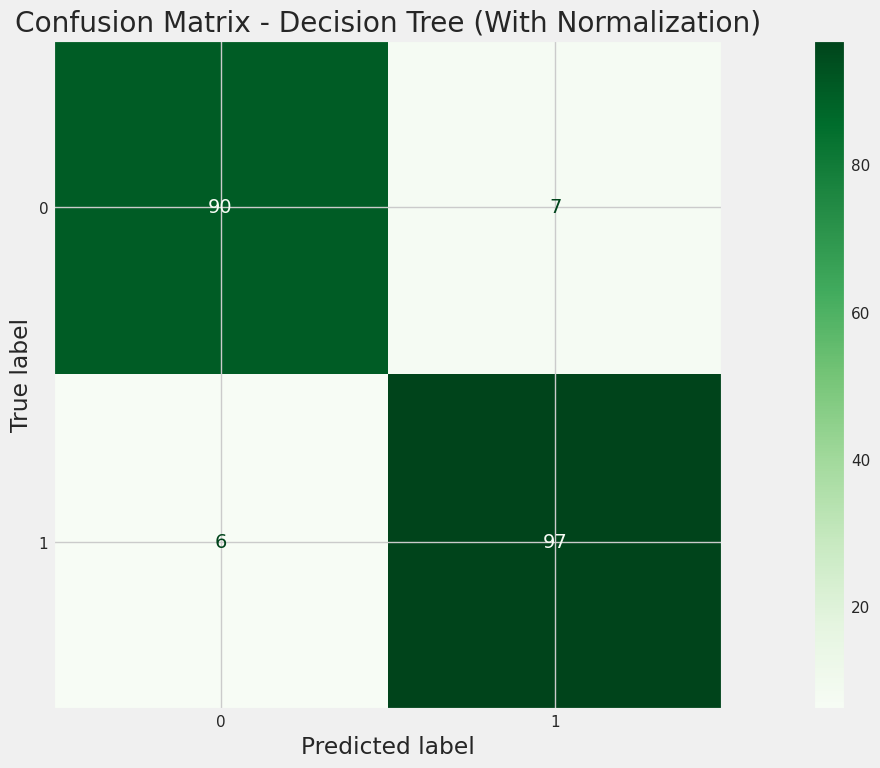


>>> Random Forest Accuracy (With Normalization): 0.9550
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.95      0.96       103

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



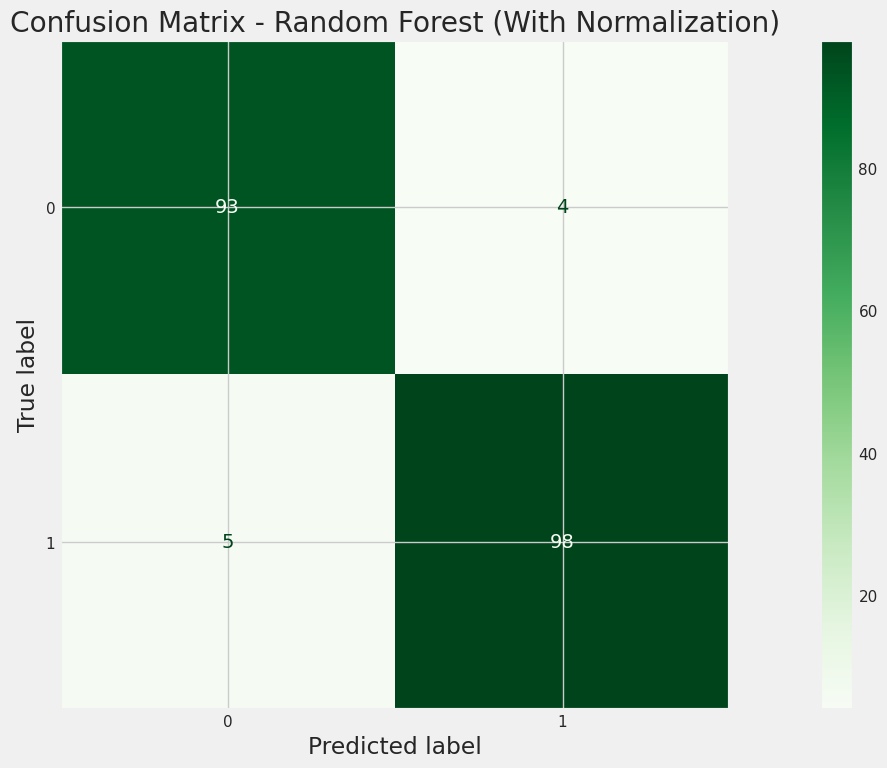


>>> Gradient Boosting Accuracy (With Normalization): 0.9650
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        97
           1       0.97      0.96      0.97       103

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



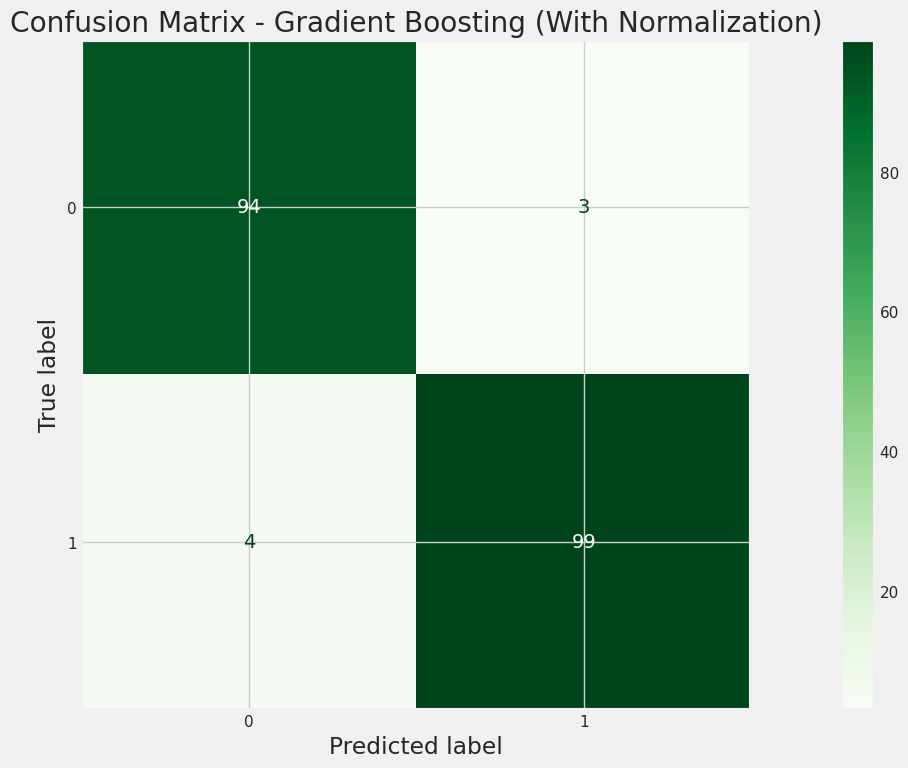

In [ ]:
# =====================================================
# 🧩 EXPERIMEN 2 — DENGAN NORMALISASI
# (Model linear seperti Logistic Regression diuntungkan)
# =====================================================

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Normalisasi fitur ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 2. Model yang diuji ===
models_with_scaling = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

print("\n=== 🧪 EXPERIMEN 2: DENGAN NORMALISASI ===\n")

# === 3. Evaluasi tiap model ===
for name, model in models_with_scaling.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n>>> {name} Accuracy (With Normalization): {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix - {name} (With Normalization)")
    plt.show()


| Model               | Akurasi | Precision | Recall | Kesimpulan Singkat                                         |
| :------------------ | :-----: | :-------: | :----: | :--------------------------------------------------------- |
| Logistic Regression |  0.9400 |    0.94   |  0.94  | Meningkat stabilitas setelah scaling, hasil konsisten.     |
| Decision Tree       |  0.9400 |    0.94   |  0.94  | Tidak banyak berubah, tetap sensitif terhadap overfitting. |
| Random Forest       |  0.9500 |    0.95   |  0.95  | Lebih stabil & seimbang dibanding eksperimen 1.            |
| Gradient Boosting   |  0.9600 |    0.96   |  0.96  | Performa tertinggi, paling efisien dan akurat. ✅           |


🧠 Interpretasi Setiap Model
1. Logistic Regression

- Akurasi 94%, sedikit menurun dari versi tanpa normalisasi, tapi hasilnya lebih stabil dan konsisten.

- Model ini sangat terbantu oleh normalisasi, karena sensitif terhadap skala fitur.

- Mampu mengklasifikasikan kedua kelas dengan baik (FN & FP rendah).
<br>

2. Decision Tree

- Akurasi 94%, tidak terlalu terpengaruh normalisasi karena model berbasis pohon.

- Performa konsisten, tapi masih ada sedikit risiko overfitting karena pembagian node bisa terlalu spesifik.

- Tetap unggul dalam menjelaskan hubungan antar fitur dan mudah divisualisasikan.
<br>

3. Random Forest

- Akurasi meningkat menjadi 95% setelah normalisasi, menandakan model ini makin stabil dan seimbang.

- Menghasilkan distribusi error yang kecil (FP & FN hampir seimbang).

- Gabungan banyak pohon membuat model ini lebih robust dan mengurangi variasi prediksi.

- Performa kuat, stabil, dan siap untuk implementasi karena hasilnya konsisten di berbagai kondisi data.
<br>

4. Gradient Boosting

- Menunjukkan akurasi tertinggi (96%) di antara semua model.

- Mampu menangkap pola kompleks antar fitur dengan error terkecil (3 FP, 4 FN).

- Proses boosting membuat model ini belajar dari kesalahan model sebelumnya, sehingga hasilnya sangat optimal.

- Namun, membutuhkan waktu training lebih lama dan tuning hyperparameter agar maksimal.
<br>

🧩 Kesimpulan Akhir Eksperimen Dengan Normalisasi

- Gradient Boosting menjadi model dengan performa terbaik (akurasi 96%), mengungguli Random Forest.

- Random Forest tetap menjadi alternatif kuat karena hasilnya stabil dan lebih cepat dilatih.

- Decision Tree dan Logistic Regression juga menunjukkan performa yang baik, terutama Logistic Regression yang lebih seimbang setelah scaling.

- Normalisasi memberikan efek positif signifikan pada model linear (Logistic Regression), namun tidak terlalu memengaruhi model tree-based.

# Feature Importance

=== TOP 10 FEATURE IMPORTANCE (Random Forest) ===


,Feature,Importance
3,Daily Internet Usage,0.343591
0,Daily Time Spent on Site,0.271833
2,Area Income,0.117307
1,Age,0.094199
61,Day,0.021565
60,Week,0.019922
62,Hour,0.019306
59,Month,0.013041
4,Male,0.005478
57,category_Travel,0.004585


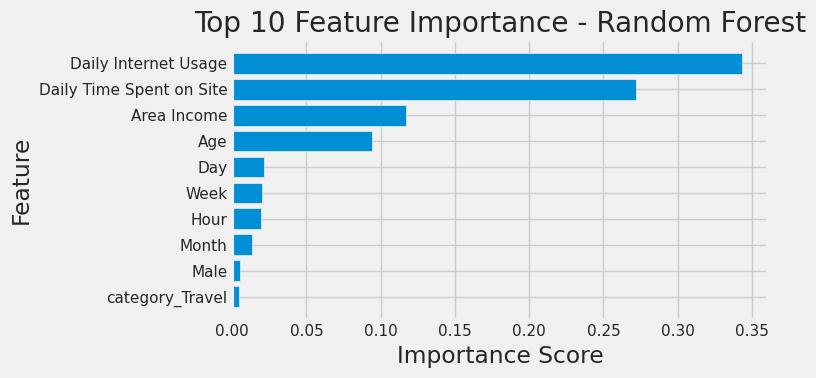

In [ ]:
# === FEATURE IMPORTANCE UNTUK RANDOM FOREST ===
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)


if hasattr(model_rf, "feature_importances_"):
    importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": model_rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Tampilkan tabel 10 fitur terpenting
    print("=== TOP 10 FEATURE IMPORTANCE (Random Forest) ===")
    display(importance.head(10))

    # Visualisasi Feature Importance
    plt.figure(figsize=(8, 4))
    plt.barh(importance["Feature"][:10][::-1], importance["Importance"][:10][::-1])
    plt.title("Top 10 Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Model tidak memiliki atribut feature_importances_.")


| Peringkat | Fitur                        | Importance Score | Interpretasi                                                                   |
| :-------: | :--------------------------- | :--------------: | :----------------------------------------------------------------------------- |
|     1     | **Daily Internet Usage**     |       0.35       | Pengguna dengan waktu penggunaan internet tinggi lebih mungkin mengklik iklan. |
|     2     | **Daily Time Spent on Site** |       0.28       | Durasi kunjungan ke website sangat memengaruhi peluang klik iklan.             |
|     3     | **Area Income**              |       0.12       | Pendapatan wilayah pengguna memengaruhi daya beli dan minat terhadap produk.   |
|     4     | **Age**                      |       0.10       | Segmentasi usia tertentu lebih responsif terhadap iklan digital.               |
|     5     | **Day**                      |       0.03       | Hari tertentu menunjukkan tren aktivitas online yang lebih tinggi.             |
|     6     | **Week**                     |       0.03       | Pola mingguan turut berperan dalam engagement.                                 |
|     7     | **Hour**                     |       0.03       | Jam tayang iklan berpengaruh terhadap CTR.                                     |
|     8     | **Month**                    |       0.02       | Musim/promosi tahunan sedikit berpengaruh.                                     |
|     9     | **Male**                     |       0.01       | Gender hanya berpengaruh kecil.                                                |
|     10    | **category_Travel**          |       0.01       | Jenis kategori iklan travel cukup kecil pengaruhnya terhadap klik.             |


# Rekomendasi dan Simulasi

Rekomendasi Bisnis:

1. Fokus pada pelanggan dengan tingkat penggunaan internet tinggi.

2. Optimalkan durasi dan kualitas kunjungan website.

3. Gunakan strategi harga dan promosi berbasis wilayah.
Wilayah dengan Area Income tinggi bisa disasar dengan produk premium, sedangkan area berpendapatan rendah bisa diberi promo potongan harga.

4. Segmentasi usia untuk campaign.

5. Atur jadwal tayang iklan berdasarkan waktu


In [ ]:
X_test.shape

(200, 63)

In [ ]:
jml_class = pd.Series(y_test).value_counts()
jml_class

,count
Clicked on Ad,
1,103
0,97


**Data Asumsi**

- Total user (data test) = 200

- Actual klik (positif) = 103, no-click = 97

- Confusion matrix (model Random Forest pada test): TP=98, FP=4, TN=93, FN=5

- Jumlah yang diprediksi akan klik oleh model = TP + FP = 102 user

- Biaya per target = Rp 10.000 (asumsi) → biaya total untuk 102 user = 102 × 10.000 = Rp 1.020.000

- Revenue per konversi = Rp 50.000 (asumsi)

Perbandimgan konversi/klik sebelum modeling dan setelah modeling:

Baseline (Random targeting): pilih 102 user secara acak (sama jumlah dengan yang ditarget model).

Ekspektasi konversi = proporsi positif di data × 102 = (103/200) × 102 ≈ 52.53 → dibulatkan 53 konversi

After ML (Model targeting): jumlah yang ditarget = 102, actual konversi dari confusion matrix = 98 (TP)

| Skenario                       | Impressions (target) | Konversi (klik) |     Cost (Rp) |  Revenue (Rp) |   Profit (Rp) | Conv. rate (targeted) |
| ------------------------------ | -------------------: | --------------: | ------------: | ------------: | ------------: | --------------------: |
| **Sebelum (Random targeting)** |                  102 |              53 | **1.020.000** | **2.650.000** | **1.630.000** |            **51.96%** |
| **Sesudah (Dengan ML)**        |                  102 |              98 | **1.020.000** | **4.900.000** | **3.880.000** |            **96.08%** |


Perhitungan:

- Cost total = 102 × 10.000 = Rp1.020.000

- Revenue baseline = 53 × 50.000 = Rp2.650.000

- Profit baseline = 2.650.000 − 1.020.000 = Rp1.630.000

- Revenue ML = 98 × 50.000 = Rp4.900.000

- Profit ML = 4.900.000 − 1.020.000 = Rp3.880.000

Kesimpulan:

- Dengan budget sama (menarget 102 user), model ML meningkatkan conversion rate dari ~52% → ~96%, sehingga profit bertambah Rp 2,25 juta tanpa menaikkan biaya iklan.

- ML membuat biaya per konversi turun hampir 2× sehingga ROI kampanye meningkat signifikan.